# install dependencies

In [ ]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [ ]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 277,seed: 372
Step 0: Loss = 8.7395998949074052, performing 11.1 it/sec
Step 100: Loss = 3.1036638054772929, performing 13.0 it/sec
Step 200: Loss = 0.4622609977410175, performing 18.5 it/sec
[Best]  Step 276: Loss = 0.1976326383625037
[Final] Step 276: Loss = 0.1976326383625037

predicted end states
------------------------------------
         5th       Mean      95th
LF1A-1  5.00e-01  5.00e-01  5.00e-01
LF1A-2  4.12e-09  4.20e-09  4.29e-09
LF1A-3  2.68e-05  2.68e-05  2.68e-05
LF1A-4  7.43e-11  7.43e-11  7.43e-11
LF1A-5  2.90e-10  2.90e-10  2.90e-10
LF1A-6  2.55e-06  2.55e-06  2.55e-06
LF1A-7  3.87e-09  3.87e-09  3.87e-09
LF1A-8  8.92e-08  8.93e-08  8.94e-08


predicted conditional events
----------------------------------------
             5th       Mean      95th
LF1A        1.00e+00  1.00e+00  1.00e+00
FSIG        1.78e-07  1.79e-07  1.79e-07
FROD       

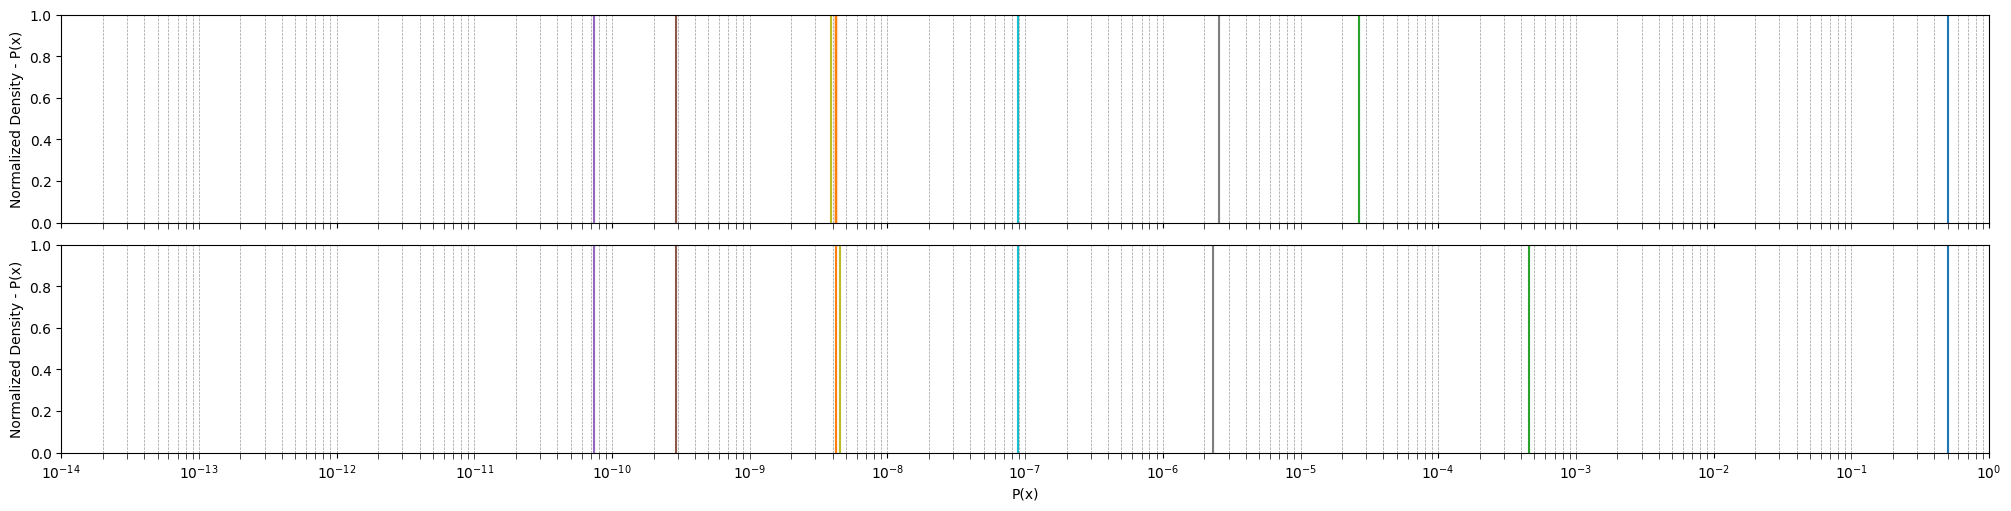

In [ ]:
tunable = {
 'num_samples': 100000,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 277,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 5.0e-1,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['LF1A', 'FSIG', 'FROD', 'PRUN|FROD', 'BPHR', 'DHRS', 'DHRL|~BPHR', 'DHRL|~DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    # 'LF1A-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    #     'probability': 1 - 5.0e-1 - 4.20e-9 - 4.55e-4 - 7.4e-11 - 2.90e-10 - 2.30e-6 - 4.5e-9 - 8.9e-8
    # },
    'LF1A-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 0, np.nan],
        'probability': 5.0e-1,
    },
    'LF1A-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, 1, np.nan],
        'probability': 4.20e-9,
    },
    'LF1A-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 0],
        'probability': 4.55e-4,
    },
    'LF1A-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, 1],
        'probability': 7.4e-11,
    },
    'LF1A-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan],
        'probability': 2.90e-10,
    },
    'LF1A-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 2.30e-6,
    },
    'LF1A-7': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.5e-9,
    },
    'LF1A-8': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8.9e-8,
    },


}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)